In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

df_pre=pd.read_csv('./datasets/wine.csv' , header=None)

df=df_pre.sample(frac=0.15)
print(df.shape)
df.head()

(975, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [7]:
X = df.iloc[:, 0:12]
y = df.iloc[: , 12]


In [11]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X , y , validation_split=0.33, epochs=100 , batch_size=20)

Epoch 1/100
33/33 [==============================] - 2s 20ms/step - loss: 4.3480 - accuracy: 0.5436 - val_loss: 0.5650 - val_accuracy: 0.8168
Epoch 2/100
33/33 [==============================] - 0s 10ms/step - loss: 0.4872 - accuracy: 0.8423 - val_loss: 0.2038 - val_accuracy: 0.9255
Epoch 3/100
33/33 [==============================] - 0s 9ms/step - loss: 0.2404 - accuracy: 0.9265 - val_loss: 0.2003 - val_accuracy: 0.9255
Epoch 4/100
33/33 [==============================] - 0s 15ms/step - loss: 0.2297 - accuracy: 0.9265 - val_loss: 0.2005 - val_accuracy: 0.9255
Epoch 5/100
33/33 [==============================] - 1s 21ms/step - loss: 0.2260 - accuracy: 0.9280 - val_loss: 0.1989 - val_accuracy: 0.9255
Epoch 6/100
33/33 [==============================] - 0s 11ms/step - loss: 0.2249 - accuracy: 0.9280 - val_loss: 0.1909 - val_accuracy: 0.9255
Epoch 7/100
33/33 [==============================] - 0s 11ms/step - loss: 0.2257 - accuracy: 0.9250 - val_loss: 0.1907 - val_accuracy: 0.9255
Epoch 8

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

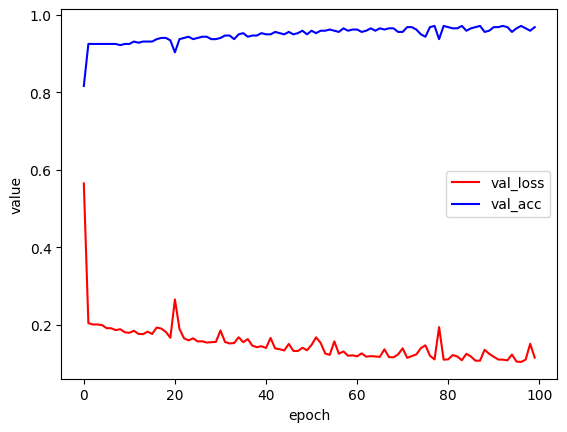

In [14]:
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(val_loss , c='red' , label='val_loss')
plt.plot(val_acc , c='blue', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:

np.random.seed(3)
tf.random.set_seed(3)

model_dir = './model/'
if not os.path.exists(model_dir): 
    os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)


model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X , y , validation_split=0.33, epochs=3500 , batch_size=500 , callbacks=[checkpointer])

Epoch 1/3500
1/2 [==============>...............] - ETA: 1s - loss: 0.9241 - accuracy: 0.7320
Epoch 1: val_loss improved from inf to 0.68639, saving model to ./model\01-0.6864.hdf5
2/2 [==============================] - 2s 554ms/step - loss: 0.9405 - accuracy: 0.7335 - val_loss: 0.6864 - val_accuracy: 0.7453
Epoch 2/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.7901 - accuracy: 0.7220

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.68639 to 0.65471, saving model to ./model\02-0.6547.hdf5
2/2 [==============================] - 0s 193ms/step - loss: 0.7350 - accuracy: 0.7320 - val_loss: 0.6547 - val_accuracy: 0.6770
Epoch 3/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.6909 - accuracy: 0.6960
Epoch 3: val_loss did not improve from 0.65471
2/2 [==============================] - 0s 123ms/step - loss: 0.6750 - accuracy: 0.6861 - val_loss: 0.6619 - val_accuracy: 0.6366
Epoch 4/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.6797 - accuracy: 0.6320
Epoch 4: val_loss improved from 0.65471 to 0.58435, saving model to ./model\04-0.5843.hdf5
2/2 [==============================] - 0s 230ms/step - loss: 0.6663 - accuracy: 0.6524 - val_loss: 0.5843 - val_accuracy: 0.6988
Epoch 5/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.6057 - accuracy: 0.6900
Epoch 5: val_loss improved from 0.58435 to 0.50519, saving model to ./model\05-0.5052.hdf5
2/2 [=====

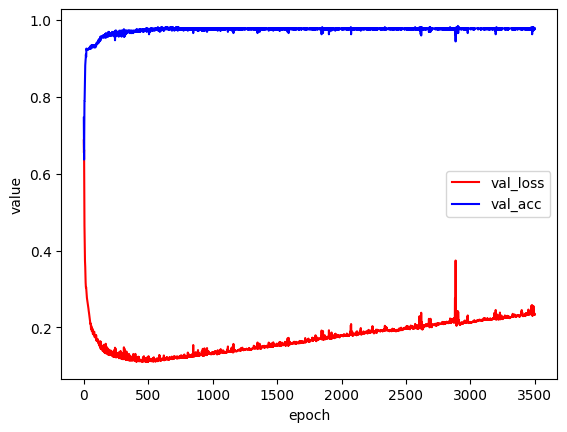

In [17]:
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(val_loss , c='red' , label='val_loss')
plt.plot(val_acc , c='blue', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [19]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

np.random.seed(3)
tf.random.set_seed(3)

model_dir = './model/'
if not os.path.exists(model_dir): 
    os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss',patience=50)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X , y , validation_split=0.33, epochs=3500 , batch_size=500 , callbacks=[early_stopping, checkpointer])

Epoch 1/3500
1/2 [==============>...............] - ETA: 1s - loss: 1.1936 - accuracy: 0.7280
Epoch 1: val_loss improved from inf to 0.82997, saving model to ./model\01-0.8300.hdf5
2/2 [==============================] - 2s 469ms/step - loss: 1.1648 - accuracy: 0.7259 - val_loss: 0.8300 - val_accuracy: 0.7547
Epoch 2/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.9972 - accuracy: 0.7060

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.82997 to 0.77139, saving model to ./model\02-0.7714.hdf5
2/2 [==============================] - 0s 258ms/step - loss: 0.9263 - accuracy: 0.7259 - val_loss: 0.7714 - val_accuracy: 0.7050
Epoch 3/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.8151 - accuracy: 0.7040
Epoch 3: val_loss did not improve from 0.77139
2/2 [==============================] - 0s 147ms/step - loss: 0.8513 - accuracy: 0.6723 - val_loss: 0.7971 - val_accuracy: 0.6242
Epoch 4/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.8442 - accuracy: 0.5980
Epoch 4: val_loss improved from 0.77139 to 0.73043, saving model to ./model\04-0.7304.hdf5
2/2 [==============================] - 0s 249ms/step - loss: 0.8574 - accuracy: 0.5957 - val_loss: 0.7304 - val_accuracy: 0.6615
Epoch 5/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.8129 - accuracy: 0.6200
Epoch 5: val_loss improved from 0.73043 to 0.64142, saving model to ./model\05-0.6414.hdf5
2/2 [=====